Global-Earthquake-Patterns

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
Data =pd.read_csv('earthquake-data.csv')

In [10]:
Data.head()

,id,datetime,latitude,longitude,magnitude,location,location-broad
0,10001,11/07/2022 15:39,19.194000,-155.491333,6,Hawaii,North America
1,10002,11/07/2022 15:45,19.174999,-155.501007,7,Hawaii,North America
2,10003,11/07/2022 16:21,19.150999,-155.474167,5,Hawaii,North America
3,10004,11/07/2022 16:22,19.174833,-155.484333,11,Hawaii,North America
4,10005,11/07/2022 16:39,1.427700,124.094100,36,Indonesia,Asia


STEP-1
Clean Outlier Magnitudes

In [12]:
Data = Data[Data['magnitude'] <= 10]

Top Earthquakes

In [14]:
Data.nlargest(5, 'magnitude')[['datetime', 'location', 'magnitude']]

,datetime,location,magnitude
10,11/07/2022 17:45,California,10
14,11/07/2022 18:24,Oregon,10
42,12/07/2022 01:47,California,10
87,12/07/2022 19:04,Nevada,10
92,12/07/2022 20:04,Hawaii,10


Earthquake Count by Region

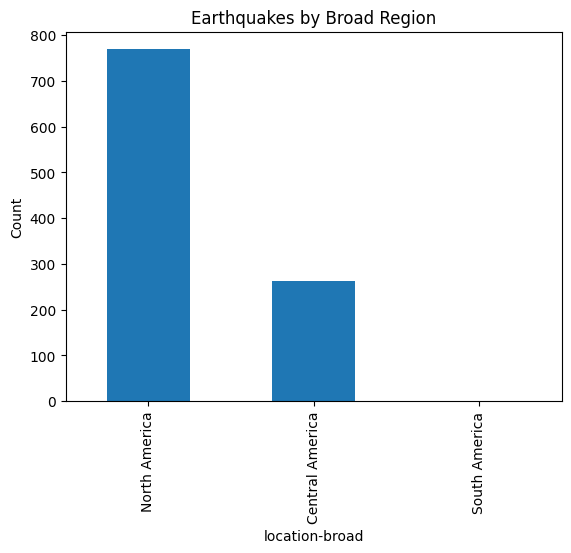

In [16]:
region_counts = Data['location-broad'].value_counts()
region_counts.plot(kind='bar', title='Earthquakes by Broad Region')
plt.ylabel('Count')
plt.show()

Average & Max Magnitude by Location

In [17]:
location_stats = Data.groupby('location')['magnitude'].agg(['count', 'mean', 'max'])
print(location_stats)

                    count      mean  max
location                                
Alaska                130  7.369231   10
Arizona                 1  6.000000    6
Arkansas                3  6.333333    7
California            131  7.541985   10
Canada                  4  8.000000   10
Chile                   1  9.000000    9
Dominican Republic      1  9.000000    9
Hawaii                273  7.058608   10
Idaho                  22  7.590909   10
Michigan                1  8.000000    8
Missouri                2  9.000000    9
Montana                 4  7.250000    9
Nevada                 34  7.882353   10
New Hampshire           1  8.000000    8
New Mexico             66  7.757576   10
New York                1  9.000000    9
North Carolina          1  6.000000    6
Oklahoma               11  6.636364    9
Oregon                  3  8.333333   10
Puerto Rico           261  7.252874   10
South Carolina          4  6.750000    8
South Dakota            1  7.000000    7
Tennessee       

Interactive Earthquake Map

In [21]:
import folium
m = folium.Map(location=[0, 0], zoom_start=2)

for _, row in Data.iterrows():
    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=row['magnitude'],  # use magnitude as size
        color='red',
        fill=True,
        popup=f"{row['location']} - Mag: {row['magnitude']}"
    ).add_to(m)
m